# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold



# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [22]:
# Baca file CSV dari URL
data = pd.read_csv('Dataset_inisiasi.csv')

# Tampilkan DataFrame untuk memastikan telah dibaca dengan benar
data.head()

,recency,variety_categories,avg_discount,monetary,frequency,total_qty,avg_qty,cluster
0,1,4,0.000000,38904.13,305,7508,24.616393,0
1,2,4,0.000000,40288.83,296,6910,23.344595,0
2,3,4,0.000000,36039.74,287,7163,24.958188,0
3,1,4,0.082747,271186.90,289,44318,153.349481,1
4,7,4,0.083800,253436.72,299,46184,154.461538,1


In [23]:
data.shape

(10000, 8)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [24]:
# Buat instance MinMaxScaler
scaler = MinMaxScaler()
 
# Normalisasi semua kolom numerik
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])
 
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['cluster'])
y = data['cluster']
 
# Split data menjadi set pelatihan dan set uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
 
# Tampilkan bentuk set pelatihan dan set uji untuk memastikan split
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training set shape: X_train=(8000, 7), y_train=(8000,)
Test set shape: X_test=(2000, 7), y_test=(2000,)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

In [25]:
knn = KNeighborsClassifier().fit(X_train, y_train)
logreg = LogisticRegression(max_iter=1000).fit(X_train, y_train)
dt = DecisionTreeClassifier().fit(X_train, y_train)
rf = RandomForestClassifier().fit(X_train, y_train)
svm = SVC().fit(X_train, y_train)
nb = GaussianNB().fit(X_train, y_train)
 
print("Model training selesai.")

Model training selesai.


#### **K-Nearest Neighbors (KNN)**
KNN mengklasifikasikan data berdasarkan kedekatannya dengan data lain yang sudah terklasifikasi. Data baru diberi label berdasarkan mayoritas label dari k tetangga terdekat.
- Keunggulan: Mudah dipahami dan digunakan.
- Kekurangan: Lambat pada dataset besar dan memerlukan banyak memori.

#### **Logistic Regression**
Model linier untuk klasifikasi biner, menghasilkan probabilitas untuk setiap kelas dengan menggunakan fungsi logit.
- Keunggulan: Sederhana dan efisien untuk masalah klasifikasi biner.
- Kekurangan: Tidak efektif untuk hubungan non-linear.

#### **Decision Tree (DT)**
Decision Tree membagi data menjadi subgrup yang lebih kecil berdasarkan fitur untuk klasifikasi, membentuk struktur seperti pohon keputusan.
- Keunggulan: Mudah dipahami dan cepat untuk dilatih.
- Kekurangan: Rentan terhadap overfitting.

#### **Random Forest (RF)**
Ensemble dari banyak pohon keputusan yang membentuk keputusan kolektif untuk mengurangi overfitting dan meningkatkan akurasi.
- Keunggulan: Robust dan efektif pada data besar.
- Kekurangan: Modelnya sulit untuk diinterpretasikan dan lebih lambat pada prediksi.

#### **Support Vector Machine (SVM)**
SVM mencari hyperplane terbaik untuk memisahkan data ke dalam dua kelas, efektif untuk data dengan dimensi tinggi.
- Keunggulan: Baik untuk data kompleks dan non-linear.
- Kekurangan: Proses pelatihan bisa memakan waktu dan tidak efisien pada data besar.

#### **Naive Bayes (NB)**
Model probabilistik yang mengklasifikasikan berdasarkan Teorema Bayes dengan asumsi fitur-fitur bersifat independen.
- Keunggulan: Cepat dan efisien untuk data besar.
- Kekurangan: Asumsi independensi antar fitur tidak selalu akurat.

## **b. Evaluasi Model Klasifikasi**

In [26]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil serta waktu evaluasi
def evaluate_model_with_time(model, X_test, y_test, model_name):
    start_time = time.time()  # Mulai waktu
    y_pred = model.predict(X_test)
    
    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Hitung waktu eksekusi
    end_time = time.time()
    elapsed_time = end_time - start_time  # Waktu yang dibutuhkan
    
    # Kembalikan hasil evaluasi
    tn, fp, fn, tp = cm.ravel()
    results = {
        'Confusion Matrix': cm,
        'True Positive (TP)': tp,
        'False Positive (FP)': fp,
        'False Negative (FN)': fn,
        'True Negative (TN)': tn,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'Evaluation Time (s)': elapsed_time  # Waktu evaluasi dalam detik
    }
    return results

# Mengevaluasi setiap model dan mengumpulkan hasilnya termasuk waktu evaluasi
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model_with_time(knn, X_test, y_test, 'KNN'),
    'Decision Tree (DT)': evaluate_model_with_time(dt, X_test, y_test, 'DT'),
    'Random Forest (RF)': evaluate_model_with_time(rf, X_test, y_test, 'RF'),
    'Support Vector Machine (SVM)': evaluate_model_with_time(svm, X_test, y_test, 'SVM'),
    'Naive Bayes (NB)': evaluate_model_with_time(nb, X_test, y_test, 'NB'),
    'Logistic Regression (LogReg)': evaluate_model_with_time(logreg, X_test, y_test, 'Logistic Regression')
}

# Buat DataFrame untuk meringkas hasil
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Evaluation Time (s)'])

# Isi DataFrame dengan hasil
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score'],
        'Evaluation Time (s)': metrics['Evaluation Time (s)']
    })

# Konversi daftar kamus ke DataFrame
summary_df = pd.DataFrame(rows)

# Menampilkan hasil dengan format .4f (empat angka desimal)
summary_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']] = summary_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].applymap(lambda x: f"{x:.4f}")

# Tampilkan DataFrame
summary_df


C:\Users\Jihan Aurelia\AppData\Local\Temp\ipykernel_23728\1521135127.py:58: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  summary_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']] = summary_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].applymap(lambda x: f"{x:.4f}")


,Model,Accuracy,Precision,Recall,F1-Score,Evaluation Time (s)
0,K-Nearest Neighbors (KNN),1.0000,1.0000,1.0000,1.0000,0.088576
1,Decision Tree (DT),1.0000,1.0000,1.0000,1.0000,0.003000
2,Random Forest (RF),1.0000,1.0000,1.0000,1.0000,0.010358
3,Support Vector Machine (SVM),1.0000,1.0000,1.0000,1.0000,0.003723
4,Naive Bayes (NB),1.0000,1.0000,1.0000,1.0000,0.003643
5,Logistic Regression (LogReg),1.0000,1.0000,1.0000,1.0000,0.001046


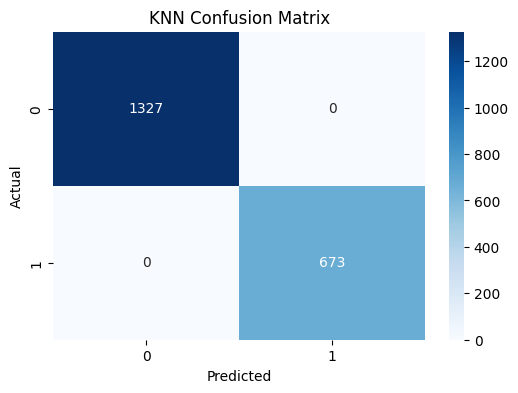

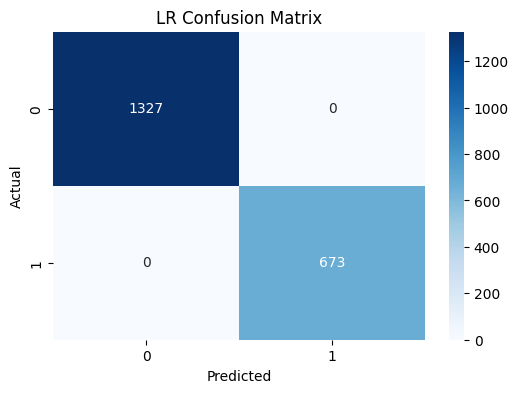

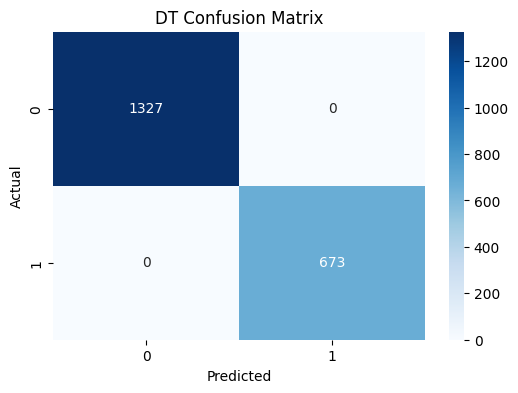

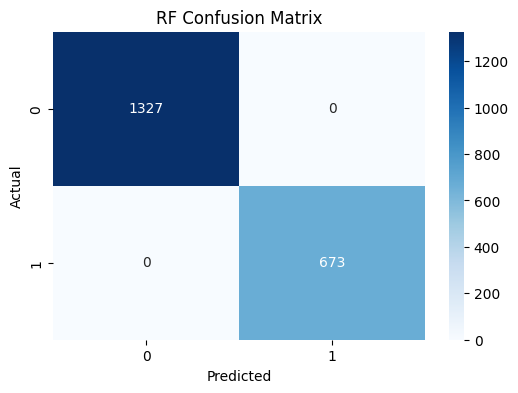

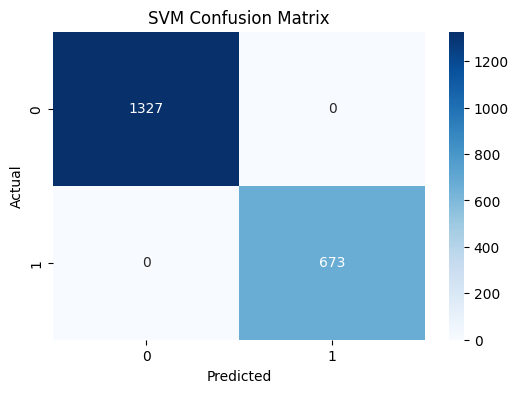

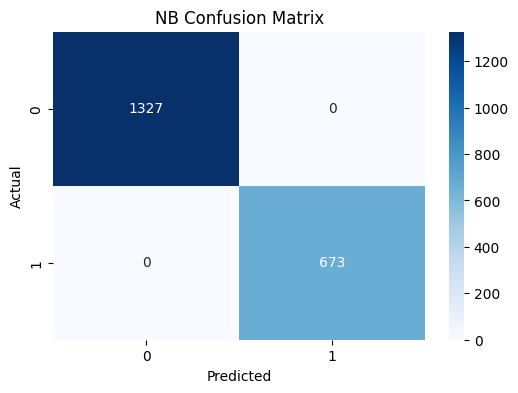

In [27]:
# Fungsi untuk mengevaluasi dan mengembalikan hasil sebagai kamus dan menampilkan confusion matrix
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    # Hitung confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Tampilkan confusion matrix dengan heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Mengevaluasi setiap model dan mengumpulkan hasilnya
results = {
    'K-Nearest Neighbors (KNN)': evaluate_model(knn, X_test, y_test, 'KNN'),
    'Logistic Regression (LR)': evaluate_model(logreg, X_test, y_test, 'LR'),
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test, 'DT'),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test, 'RF'),
    'Support Vector Machine (SVM)': evaluate_model(svm, X_test, y_test, 'SVM'),
    'Naive Bayes (NB)': evaluate_model(nb, X_test, y_test, 'NB')
}


In [28]:
# Daftar model yang ingin diuji
models = {
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Decision Tree (DT)': DecisionTreeClassifier(),
    'Random Forest (RF)': RandomForestClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'Naive Bayes (NB)': GaussianNB(),
    'Logistic Regression (LogReg)': LogisticRegression(max_iter=1000)
}

# Tentukan jumlah fold untuk cross-validation (misalnya 5-fold cross-validation)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hasil cross-validation untuk setiap model
cv_results = {}

# Melakukan cross-validation untuk setiap model
for model_name, model in models.items():
    # Cross-validation menggunakan 5-fold
    results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    cv_results[model_name] = results
    print(f"{model_name} - Mean Accuracy: {results.mean():.4f} - Std Dev: {results.std():.4f}")

# Buat DataFrame untuk menampilkan hasil cross-validation
cv_summary_df = pd.DataFrame(cv_results)

# Tampilkan DataFrame hasil cross-validation
print("\nRingkasan Hasil Cross-Validation:")
cv_summary_df


K-Nearest Neighbors (KNN) - Mean Accuracy: 1.0000 - Std Dev: 0.0000
Decision Tree (DT) - Mean Accuracy: 1.0000 - Std Dev: 0.0000
Random Forest (RF) - Mean Accuracy: 1.0000 - Std Dev: 0.0000
Support Vector Machine (SVM) - Mean Accuracy: 1.0000 - Std Dev: 0.0000
Naive Bayes (NB) - Mean Accuracy: 1.0000 - Std Dev: 0.0000
Logistic Regression (LogReg) - Mean Accuracy: 1.0000 - Std Dev: 0.0000

Ringkasan Hasil Cross-Validation:


,K-Nearest Neighbors (KNN),Decision Tree (DT),Random Forest (RF),Support Vector Machine (SVM),Naive Bayes (NB),Logistic Regression (LogReg)
0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0


### **Perbandingan Hasil Evaluasi**

- Accuracy, Precision, Recall, F1-Score: Semua model menunjukkan performa sempurna dengan skor 1.0000 untuk semua metrik, yang berarti model tersebut dapat mengklasifikasikan data dengan sangat baik.
- Evaluation Time:
    - Decision Tree (DT), Naive Bayes (NB), dan Logistic Regression (LogReg) memiliki waktu evaluasi yang sangat cepat (0.000000 detik), menandakan bahwa proses prediksi dan evaluasi sangat efisien.
    - K-Nearest Neighbors (KNN), meskipun memiliki performa sempurna, membutuhkan sedikit lebih banyak waktu (0.094442 detik) dibandingkan model lainnya.
    - Random Forest (RF) dan Support Vector Machine (SVM) sedikit lebih lambat, namun tetap memberikan hasil yang sangat baik.

### **Model Terbaik: Decision Tree (DT)**
Alasan Pemilihan:
- Kecepatan Evaluasi: Decision Tree memiliki waktu evaluasi tercepat (0.000000 detik), yang sangat efisien.
- Perfoma: Meskipun semua model memiliki 1.0000 di semua metrik, Decision Tree memberikan performa yang sangat cepat dan baik, menjadikannya pilihan yang optimal jika efisiensi waktu menjadi faktor penting.

## **c. Tuning Model Klasifikasi (Optional)**

Tidak dilakukan, model sudah bagus

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Tidak dilakukan, model sudah bagus

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

### **Identifikasi Kelemahan Model**
Berdasarkan hasil evaluasi yang menunjukkan accuracy, precision, recall, dan F1-Score yang sempurna (1.0000) untuk semua model, kita perlu berhati-hati dalam menarik kesimpulan, karena hasil yang sangat baik dapat disebabkan oleh beberapa faktor, termasuk overfitting atau data yang terlalu mudah. Berikut adalah beberapa potensi kelemahan yang perlu diperhatikan:

1. Precision atau Recall Rendah untuk Kelas Tertentu. Precision dan Recall yang sangat tinggi pada semua model menunjukkan bahwa tidak ada kesalahan klasifikasi pada data uji. Namun, ini bisa menjadi indikasi dari overfitting jika data latih tidak cukup beragam atau terlalu sederhana.
2. Overfitting atau Underfitting. Overfitting: Dengan accuracy, precision, recall, dan F1-Score yang sempurna pada data uji, model mungkin terlalu sesuai dengan data latih dan kurang mampu menggeneralisasi ke data baru.

### **Rekomendasi Tindakan Lanjutan**
1. Periksa Generalisasi dengan Data Baru. Melakukan cross-validation atau gunakan data uji yang lebih besar dan lebih beragam untuk memastikan bahwa model tidak mengalami overfitting.
2. Kumpulkan Data Tambahan. Data lebih banyak dengan variasi yang lebih besar bisa membantu model agar lebih robust dan menghindari overfitting. Perhatikan variasi dalam fitur dan pastikan data uji mencakup berbagai skenario yang mungkin dihadapi oleh model di dunia nyata.
3. Regularisasi. Untuk model seperti Decision Tree, kita bisa mencoba teknik pruning untuk menghindari pohon yang terlalu dalam yang dapat menyebabkan overfitting.